DEP INTERNSHIP TASK NO 03                       
TELECOMMUNICATION CHURN PREDICTION USING MACHINE LEARNING


CREATED BY: SYED HAMMAD JAVED 

 Importing the libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

LOADING THE DATASET

In [8]:

churn_df = pd.read_excel("Telco_customer_churn.xlsx")

UNDERSTANDING THE DATASET

In [9]:
churn_df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

 Exploratory Data Analysis (EDA) 

In [10]:
churn_df.shape

(7043, 33)

In [11]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [12]:
churn_df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

REMOVING UNNECESSARY COLUMNS

In [13]:
churn_df.drop("Churn Reason", inplace = True, axis = 1)
churn_df.drop("Churn Label", inplace = True, axis = 1)

DESCRIPTIVE ANLAYSIS OF CHURN

In [14]:
churn_df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Churn Value')

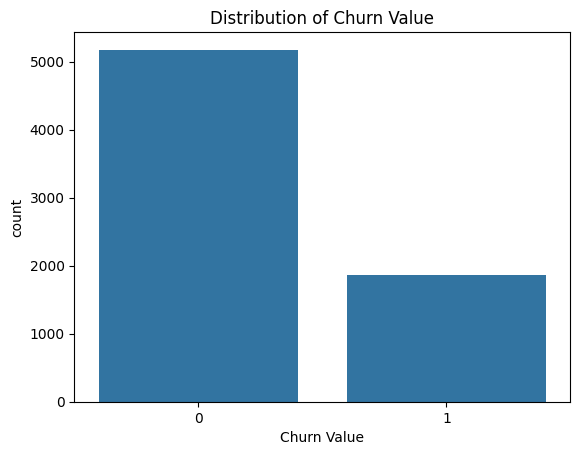

In [15]:
sns.countplot(x = "Churn Value", data = churn_df)
plt.title("Distribution of Churn Value")

In [16]:

Cat_cols = []

for col in churn_df.columns:
    if churn_df[col].dtype == "object":
        Cat_cols.append(col)

print("We have {} catagorical columns:".format(len(Cat_cols)))
Cat_cols

We have 22 catagorical columns:


['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges']

**Lets find out the number of binary cols**

In [17]:
# Lets find out the number of binary variables
binary_cols = []

for col in churn_df.columns:
    if churn_df[col].value_counts().shape[0] ==2:
        binary_cols.append(col)

print("We have {} binary columns:".format(len(binary_cols)))
binary_cols

We have 7 binary columns:


['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Paperless Billing',
 'Churn Value']

Lets examine distribution of these variables:

<Axes: xlabel='Phone Service', ylabel='count'>

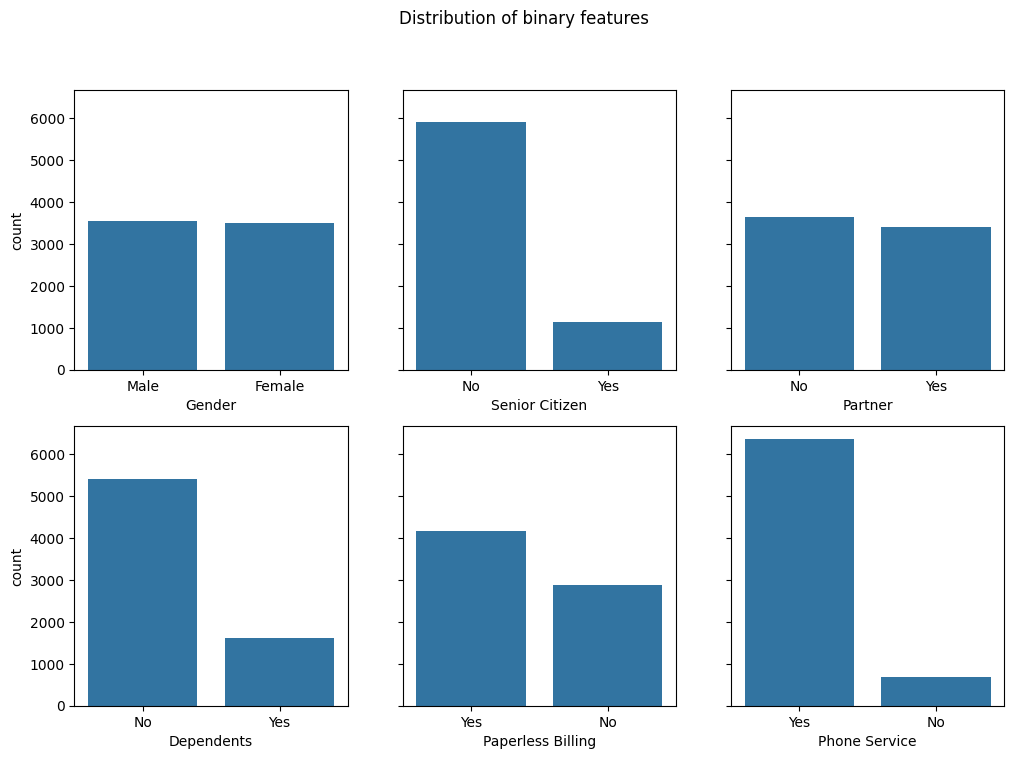

In [18]:
fig, axes = plt.subplots(2,3, figsize = (12,8), sharey = True)
plt.suptitle("Distribution of binary features")
sns.countplot(x = "Gender", data = churn_df, ax=axes[0,0])
sns.countplot(x = "Senior Citizen", data = churn_df, ax=axes[0,1])
sns.countplot(x = "Partner", data = churn_df, ax=axes[0,2])
sns.countplot(x = "Dependents", data = churn_df, ax=axes[1,0])
sns.countplot(x = "Paperless Billing", data = churn_df, ax=axes[1,1])
sns.countplot(x = "Phone Service", data = churn_df, ax=axes[1,2])

In [19]:
churn_df[['Gender', 'Churn Value']].groupby(['Gender']).mean()

Churn Value
Gender             
Female     0.269209
Male       0.261603

In [20]:
churn_df[['Senior Citizen', 'Churn Value']].groupby('Senior Citizen').mean()

Churn Value
Senior Citizen             
No                 0.236062
Yes                0.416813

In [21]:
churn_df[['Partner', 'Churn Value']].groupby('Partner').mean()

Churn Value
Partner             
No          0.329580
Yes         0.196649

In [22]:
churn_df[['Dependents', 'Churn Value']].groupby('Dependents').mean()

Churn Value
Dependents             
No             0.325517
Yes            0.065151

In [23]:
churn_df[['Phone Service', 'Churn Value']].groupby('Phone Service').mean()

Churn Value
Phone Service             
No                0.249267
Yes               0.267096

In [24]:
churn_df[['Paperless Billing', 'Churn Value']].groupby('Paperless Billing').mean()

Churn Value
Paperless Billing             
No                    0.163301
Yes                   0.335651

In [25]:

non_binary_cat_cols = [i for i in Cat_cols if i not in binary_cols ]
non_binary_cat_cols

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Payment Method',
 'Total Charges']

<Axes: xlabel='Multiple Lines', ylabel='count'>

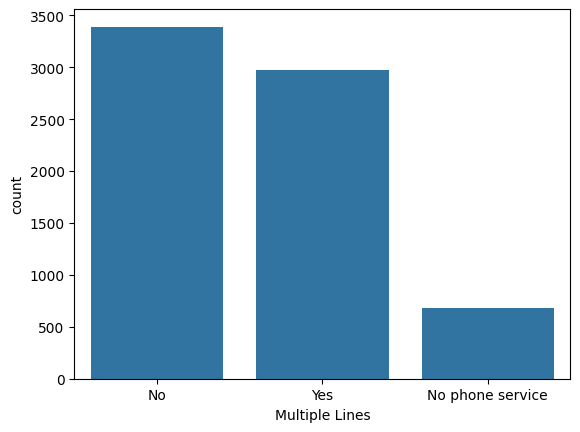

In [26]:
sns.countplot(x = "Multiple Lines", data = churn_df)

In [27]:
churn_df[['Multiple Lines', 'Churn Value']].groupby('Multiple Lines').mean().sort_values(by = 'Churn Value', ascending=False)

Churn Value
Multiple Lines               
Yes                  0.286099
No                   0.250442
No phone service     0.249267

<Axes: xlabel='Internet Service', ylabel='count'>

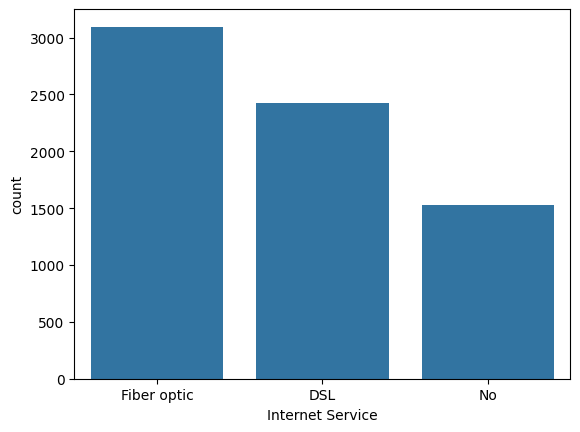

In [28]:
sns.countplot(x = "Internet Service", data = churn_df,
              order = churn_df['Internet Service'].value_counts().index)

In [29]:
churn_df[['Internet Service', 'Churn Value']].groupby('Internet Service').mean().sort_values(by= 'Churn Value', ascending = False)

Churn Value
Internet Service             
Fiber optic          0.418928
DSL                  0.189591
No                   0.074050

People with Fiber Optic have a much higher churn rate. Lets explore the factor behind it

In [30]:
churn_df[['Monthly Charges', 'Internet Service']].groupby('Internet Service').mean().sort_values(by = 'Monthly Charges')

Monthly Charges
Internet Service                 
No                      21.079194
DSL                     58.102169
Fiber optic             91.500129

 Lets explore the internet related features

<Axes: xlabel='Streaming Movies', ylabel='count'>

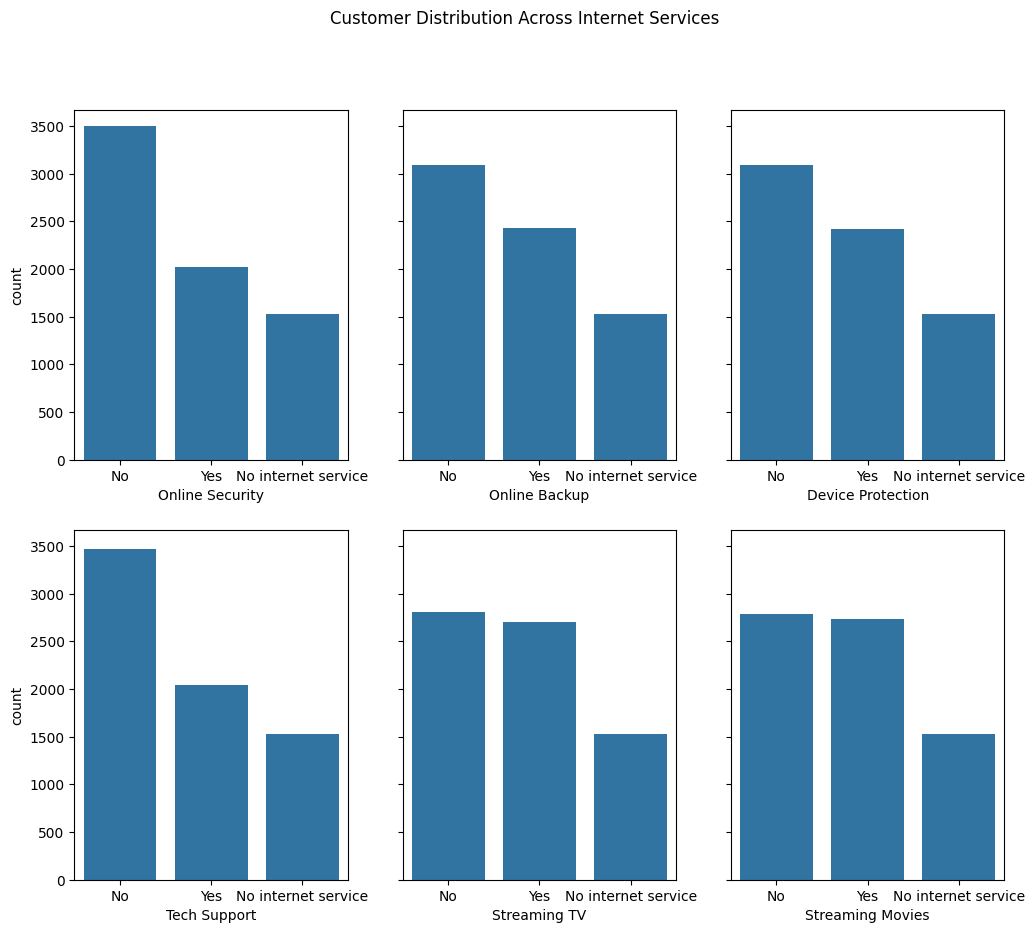

In [31]:
fig, axes = plt.subplots(2,3, figsize = (12,10), sharey = True)
plt.suptitle('Customer Distribution Across Internet Services')
sns.countplot(x='Online Security', data = churn_df, ax=axes[0,0], order = churn_df['Online Security'].value_counts().index)
sns.countplot(x='Online Backup', data = churn_df, ax=axes[0,1], order = churn_df['Online Backup'].value_counts().index)
sns.countplot(x='Device Protection', data = churn_df, ax=axes[0,2], order = churn_df['Device Protection'].value_counts().index)
sns.countplot(x='Tech Support', data = churn_df, ax=axes[1,0], order = churn_df['Tech Support'].value_counts().index)
sns.countplot(x='Streaming TV', data = churn_df, ax=axes[1,1], order = churn_df['Streaming TV'].value_counts().index)
sns.countplot(x='Streaming Movies', data = churn_df, ax=axes[1,2], order = churn_df['Streaming Movies'].value_counts().index)

In [32]:
churn_df[['Online Security', 'Churn Value']].groupby('Online Security').mean().sort_values(by='Online Security')

Churn Value
Online Security                 
No                      0.417667
No internet service     0.074050
Yes                     0.146112

In [33]:
churn_df[['Device Protection', 'Churn Value']].groupby('Device Protection').mean().sort_values(by='Device Protection')

Churn Value
Device Protection               
No                      0.391276
No internet service     0.074050
Yes                     0.225021

In [34]:
churn_df[['Online Backup', 'Churn Value']].groupby('Online Backup').mean().sort_values(by='Online Backup')

Churn Value
Online Backup                   
No                      0.399288
No internet service     0.074050
Yes                     0.215315

In [35]:
churn_df[['Tech Support', 'Churn Value']].groupby('Tech Support').mean().sort_values(by='Tech Support')

Churn Value
Tech Support                    
No                      0.416355
No internet service     0.074050
Yes                     0.151663

In [36]:
churn_df[['Streaming TV', 'Churn Value']].groupby('Streaming TV').mean().sort_values(by='Streaming TV')

Churn Value
Streaming TV                    
No                      0.335231
No internet service     0.074050
Yes                     0.300702

In [37]:
churn_df[['Streaming Movies', 'Churn Value']].groupby('Streaming Movies').mean().sort_values(by='Streaming Movies')

Churn Value
Streaming Movies                
No                      0.336804
No internet service     0.074050
Yes                     0.299414

### Exploring Contract and Payment Method

Text(0.5, 1.0, 'Customers by Contract Type')

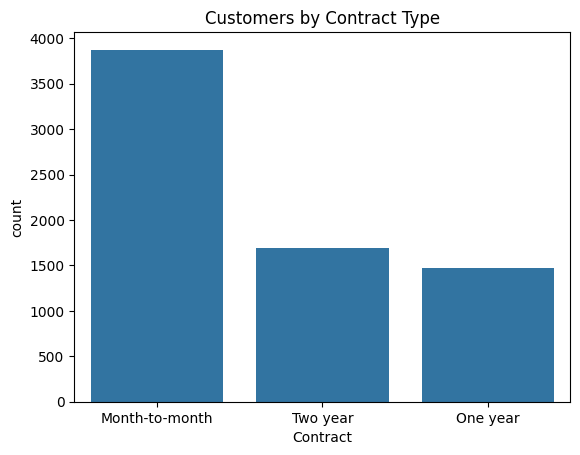

In [38]:
sns.countplot(x = 'Contract', data = churn_df)
plt.title('Customers by Contract Type')

In [39]:
churn_df[['Contract', 'Churn Value']].groupby('Contract').mean()

Churn Value
Contract                   
Month-to-month     0.427097
One year           0.112695
Two year           0.028319

Text(0.5, 1.0, 'Customers by Contract Type')

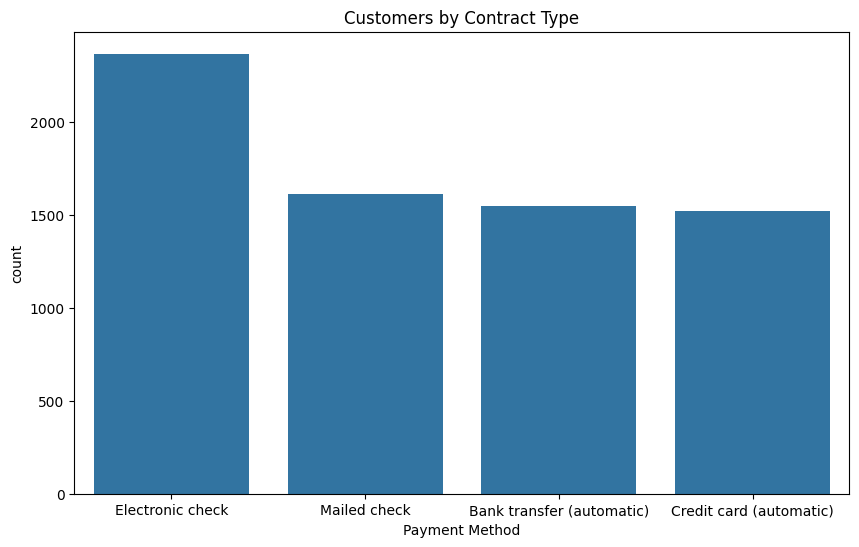

In [40]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Payment Method', data = churn_df, order = churn_df['Payment Method'].value_counts().index)
plt.title('Customers by Contract Type')

In [41]:
churn_df[['Payment Method', 'Churn Value']].groupby('Payment Method').mean().sort_values(by = 'Churn Value')

Churn Value
Payment Method                        
Credit card (automatic)       0.152431
Bank transfer (automatic)     0.167098
Mailed check                  0.191067
Electronic check              0.452854

Here's something worth noting: Customers who use electronic checks are more likely to leave, and this payment method is used most often by customers.

### Exploring Continuous Feature

In [42]:
num_cols = []

for col in churn_df.columns:
    if churn_df[col].dtype.kind in 'iufc':
        num_cols.append(col)
num_cols

['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

Text(0.5, 1.0, 'Tenure vs Churn Value')

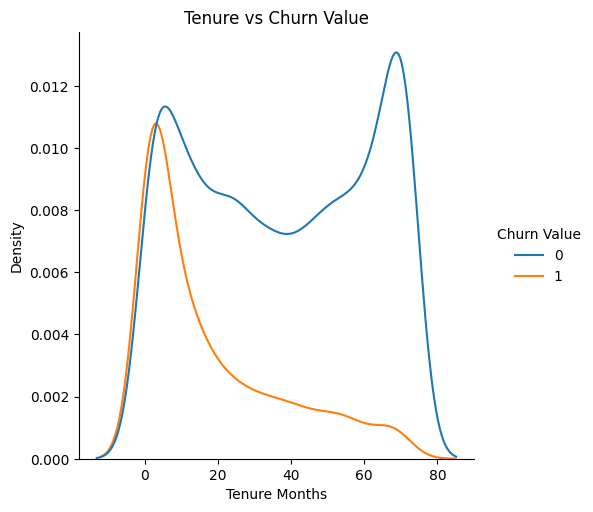

In [43]:

sns.displot(data = churn_df, x = "Tenure Months", hue = "Churn Value", kind = "kde")
plt.title('Tenure vs Churn Value')

Text(0.5, 1.0, 'Monthly Charges vs Churn Value')

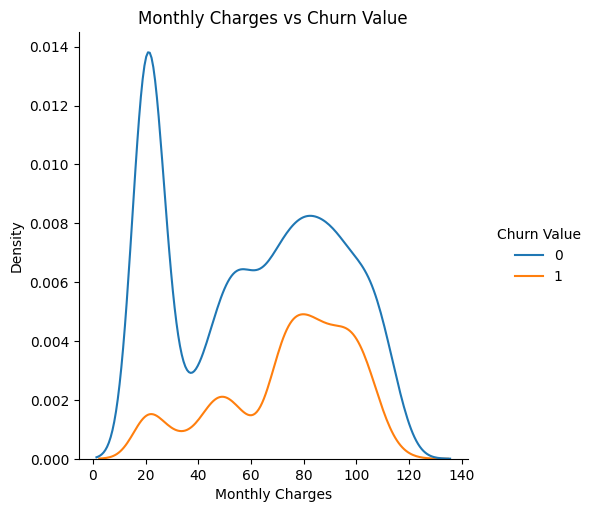

In [44]:

sns.displot(data = churn_df, x= 'Monthly Charges', hue = 'Churn Value', kind = "kde")
plt.title('Monthly Charges vs Churn Value')

In [45]:
churn_df[['Monthly Charges', 'Churn Value', 'Tenure Months']].groupby('Churn Value').mean()

Monthly Charges  Tenure Months
Churn Value                                
0                  61.265124      37.569965
1                  74.441332      17.979133

Text(0.5, 1.0, 'CLTV vs Churn Value')

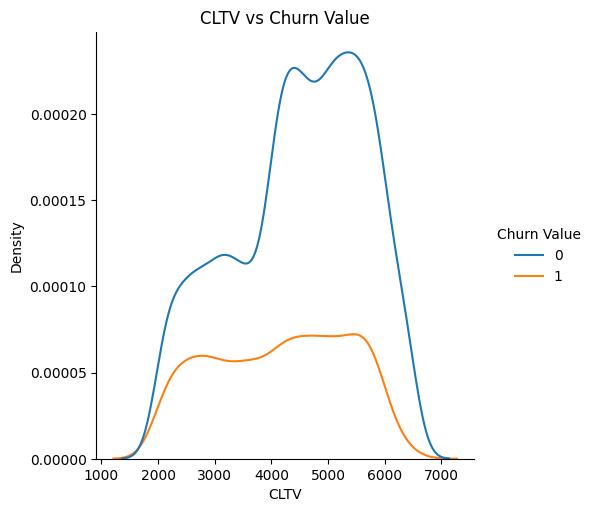

In [46]:
# Explore CLTV
sns.displot(data=churn_df, x='CLTV', hue='Churn Value', kind='kde')
plt.title('CLTV vs Churn Value')

In [47]:
churn_df[['CLTV', 'Churn Value']].groupby('Churn Value').mean()

CLTV
Churn Value             
0            4490.921337
1            4149.414660

In [48]:
churn_df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score',
       'CLTV'],
      dtype='object')

In [49]:
filtered_df = churn_df.iloc[:, 9:]
filtered_df.drop(['Gender','Total Charges'], inplace = True, axis=1)

In [50]:
cat_features = [i for i in filtered_df.columns if filtered_df[i].dtype == 'object']
cat_features

['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

 Encoding and Feature Scaling

 One-hot encoding the catagorical features

In [51]:

encoded_df = pd.get_dummies(filtered_df, columns = cat_features, drop_first = True)

 Scaling the continous features


In [52]:
scaler = MinMaxScaler()
temp_1 = scaler.fit_transform(filtered_df[["Tenure Months"]])
temp_2 = scaler.fit_transform(filtered_df[["Monthly Charges"]])
temp_3 = scaler.fit_transform(filtered_df[['CLTV']])

In [53]:
encoded_df['Tenure Months'] = temp_1
encoded_df['Monthly Charges'] = temp_2
encoded_df['CLTV'] = temp_3

 Treating the Imbalance Data

Trating the imbalance data using upsampling technique

Text(0.5, 1.0, 'Distribution of Target Before Upsampling')

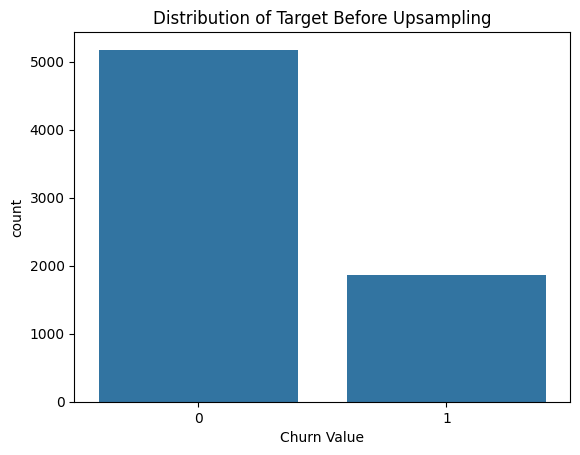

In [54]:
sns.countplot(x = "Churn Value", data = churn_df)
plt.title('Distribution of Target Before Upsampling')

In [55]:
churned = encoded_df[encoded_df['Churn Value']==1]
not_churned = encoded_df[encoded_df['Churn Value'] == 0]

In [56]:
churned_upsampled = resample(churned,
                             replace = True,
                             n_samples = len(not_churned),
                             random_state = 1)

Text(0.5, 1.0, 'Distribution of Target After Upsampling')

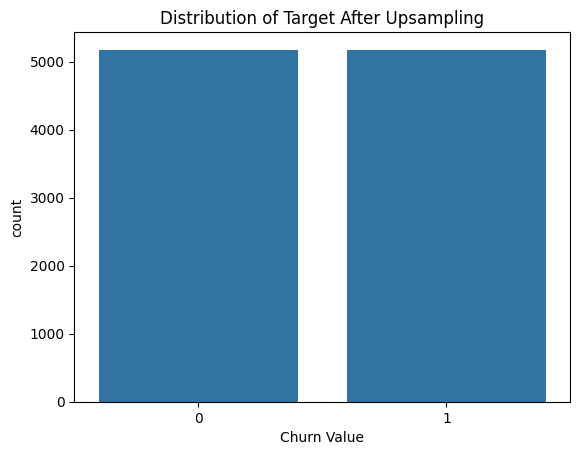

In [57]:
final_df = pd.concat([churned_upsampled, not_churned])
sns.countplot(x = "Churn Value", data = final_df)
plt.title("Distribution of Target After Upsampling")

 Model Building and Model Selection


In [58]:

X = final_df.drop('Churn Value', axis = 1)

Y = final_df['Churn Value']

In [59]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size = 0.2,
                                                    random_state = 1)

 LogisticRegression Model

In [60]:
Logi_model = LogisticRegression(max_iter = 500)

In [61]:
Logi_model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [62]:
logi_train_pred = Logi_model.predict(X_train)
logi_acc_train = accuracy_score(logi_train_pred, Y_train)
print("Accuracy score on trianing data:",logi_acc_train)

#
logi_test_pred = Logi_model.predict(X_test)
logi_acc_test = accuracy_score(logi_test_pred, Y_test)
print("Accuracy score on test data:",logi_acc_test)

Accuracy score on trianing data: 0.911331239429814
Accuracy score on test data: 0.9091787439613527


In [63]:
logi_recall = recall_score(Y_test,logi_test_pred)
logi_precision = precision_score(Y_test, logi_test_pred)
print("LogisticRegression model's metrics:\n")
print("Accuracy on Training Data:", round(logi_acc_train, 2))
print("Accuracy on Test Data:", round(logi_acc_test,2))
print("Recall Score:", round(logi_recall,2))
print("Precision Score:", round(logi_precision,2))

LogisticRegression model's metrics:

Accuracy on Training Data: 0.91
Accuracy on Test Data: 0.91
Recall Score: 0.92
Precision Score: 0.91


 Decision Tree Classifier

In [64]:

clf = DecisionTreeClassifier(random_state=42)

In [65]:

clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [66]:

dec_tree_train_pred = clf.predict(X_train)
dec_tree_acc_train = accuracy_score(dec_tree_train_pred, Y_train)
print("Accuracy score on training data:",dec_tree_acc_train)

dec_tree_test_pred = clf.predict(X_test)
dec_tree_acc_test = accuracy_score(dec_tree_test_pred, Y_test)
print("Accuracy score on test data:",dec_tree_acc_test)

Accuracy score on training data: 1.0
Accuracy score on test data: 0.9599033816425121


In [67]:

dec_tree_recall = recall_score(Y_test,dec_tree_test_pred)
dec_tree_precision = precision_score(Y_test, dec_tree_test_pred)
print("Decision Tree model's metrics:\n")
print("Accuracy on Training Data:", round(dec_tree_acc_train, 2))
print("Accuracy on Test Data:", round(dec_tree_acc_test,2))
print("Recall Score:", round(dec_tree_recall,2))
print("Precision Score:", round(dec_tree_precision,2))

Decision Tree model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.96
Recall Score: 0.98
Precision Score: 0.95
